# Capstone Project: The Battle of Neighbourhoods

### Table of Contents

This report is presented in the following parts as shown below: 

1. [Introduction](#Introduction) 
2. [Data](#Data)
3. [Methodology](#Methodology)
4. [Result](#Result)
5. [Discussion](#Discussion)
6. [Conclusion](#Conclusion)

## Introduction

### Description of the Problem

There is a growing number of people in the UK, who are changing their lifestyle by switching their diets and choosing to become vegan. Especially, in London where there is a higher population, of the number people who are vegan than anywhere else in the UK.

Despite there being many fine restaurants in London, only a few of them specialise in vegan dishes. While many restaurants do have a vegan option, the menu is limited. You can struggle to find good place to dine if you are a vegan.

### Veganism in the UK

* In 2018, the UK launched more vegan products than any nation.
* Orders of vegan meals grew 388% between 2016 and 2018 and they are now the UK’s fastest growing takeaway choice.
* Demand for meat-free food in the UK increased by 987% in 2017 and going vegan was predicted to be the biggest food trend in 2018.
* The number of vegans in Great Britain quadrupled between 2014 and 2019. In 2019 there were 600,000 vegans, or 1.16% of the population; 276,000 (0.46%) in 2016; and 150,000 (0.25%) in 2014. Sources: Ipsos Mori surveys, commissioned by The Vegan Society, 2016 and 2019, and The Food & You surveys, organised by the Food Standards Agency (FSA) and the National Centre for Social Science Research (Natcen).
* The sign-ups for the Veganuary campaign - where people eat vegan for the month of January - hit record highs in 2020, with over 400,000 people signing up. In comparison, there were 250,000 participants in 2019, 168,500 in 2018; 59,500 in 2017; 23,000 in 2016; 12,800 in 2015; and 3,300 in 2014.

### Discussion of the Background

The most popular vegan dishes are south indian vegan dishes. India host the largest number of vegetarians/vegans anywhere else in the world. They specilaise in vegan/vegetarian dishes rather than, in some restaurants where meat dishes are altered to be catered for vegans.

My client, a successful restaurant chain in India is looking to expand operation into London. They want to create a high-end Indian vegan restaurant that comes with organic mix and healthy. Their target is not only Indians/vegans, but they are pro-organic and healthy eating. They also want to encourage people who are not Indian/vegan that Indian vegan dishes can be better tasting and much healthier than to what they normally consume. Since the London demography is so big, my client needs deeper insight from available data in other to decide where to establish the first restaurant.

## Data

### Description of the Data

This project will rely on public data from Wikipedia and Foursquare.

#### The Dataset (1)

In this project, London will be used as synonymous to the "Greater London Area" in this project. Within the Greater London Area, there are areas that are within the London Area Postcode. The focus of this project will be the nieghbourhoods are that are within the London Post Code area.

The London Area consists of 32 Boroughs and the "City of London". Our data will be from the link - https://en.wikipedia.org/wiki/List_of_areas_of_London

A sample of the web scrapped of the Wikipedia page for the Greater London Area data is provided below:

In [4]:
# library for BeautifulSoup
from bs4 import BeautifulSoup

# library to handle data in a vectorized manner
import numpy as np

# library for data analysis
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# library to handle JSON files
import json

!pip -q install geopy
# convert an address into latitude and longitude values
from geopy.geocoders import Nominatim

# library to handle requests
import requests

# tranform JSON file into a pandas dataframe
from pandas.io.json import json_normalize

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

# install the Geocoder
!pip -q install geocoder
import geocoder

# import time
import time

!pip -q install folium
import folium # map rendering library

In [5]:
wikipedia_link = 'https://en.wikipedia.org/wiki/List_of_areas_of_London'
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:64.0) Gecko/20100101 Firefox/64.0'}
wikipedia_page = requests.get(wikipedia_link, headers = headers)
wikipedia_page

<Response [200]>

In [6]:
# Cleans html file
soup = BeautifulSoup(wikipedia_page.content, 'html.parser')
# This extracts the "tbody" within the table where class is "wikitable sortable"
table = soup.find('table', {'class':'wikitable sortable'}).tbody

In [7]:
# Extracts all "tr" (table rows) within the table above
rows = table.find_all('tr')

In [8]:
# Extracts the column headers, removes and replaces possible '\n' with space for the "th" tag
columns = [i.text.replace('\n', '')
           for i in rows[0].find_all('th')]

In [9]:
# Converts columns to pd dataframe
df = pd.DataFrame(columns = columns)
df

,Location,London borough,Post town,Postcode district,Dial code,OS grid ref


In [10]:
# Extracts every row with corresponding columns
# Then appends the values to the create pd dataframe "df"
for i in range(1, len(rows)):
    tds = rows[i].find_all('td')
    
    
    if len(tds) == 7:
        values = [tds[0].text, tds[1].text, tds[2].text.replace('\n', ''.replace('\xa0','')), tds[3].text, tds[4].text.replace('\n', ''.replace('\xa0','')), tds[5].text.replace('\n', ''.replace('\xa0','')), tds[6].text.replace('\n', ''.replace('\xa0',''))]
    else:
        values = [td.text.replace('\n', '').replace('\xa0','') for td in tds]
        
        df = df.append(pd.Series(values, index = columns), ignore_index = True)

        df

In [11]:
df.head(5)

,Location,London borough,Post town,Postcode district,Dial code,OS grid ref
0,Abbey Wood,"Bexley, Greenwich [7]",LONDON,SE2,020,TQ465785
1,Acton,"Ealing, Hammersmith and Fulham[8]",LONDON,"W3, W4",020,TQ205805
2,Addington,Croydon[8],CROYDON,CR0,020,TQ375645
3,Addiscombe,Croydon[8],CROYDON,CR0,020,TQ345665
4,Albany Park,Bexley,"BEXLEY, SIDCUP","DA5, DA14",020,TQ478728


In [12]:
df = df.rename(index=str, columns = {'Location': 'Location', 'London\xa0borough': 'Borough', 'Post town': 'Post-town', 'Postcode\xa0district': 
                                     'Postcode', 'Dial\xa0code': 'Dial-code', 'OS grid ref': 'OSGridRef'})

In [13]:
df.head(5)

,Location,Borough,Post-town,Postcode,Dial-code,OSGridRef
0,Abbey Wood,"Bexley, Greenwich [7]",LONDON,SE2,020,TQ465785
1,Acton,"Ealing, Hammersmith and Fulham[8]",LONDON,"W3, W4",020,TQ205805
2,Addington,Croydon[8],CROYDON,CR0,020,TQ375645
3,Addiscombe,Croydon[8],CROYDON,CR0,020,TQ345665
4,Albany Park,Bexley,"BEXLEY, SIDCUP","DA5, DA14",020,TQ478728


Looking the data, under the Borough, there are borough names with []. These are references extracted from the wiki page. So remove these, the following was done:

In [14]:
df['Borough'] = df['Borough'].map(lambda x: x.rstrip(']').rstrip('0123456789').rstrip('['))

In [15]:
df.shape

(533, 6)

In [16]:
df.head(5)

,Location,Borough,Post-town,Postcode,Dial-code,OSGridRef
0,Abbey Wood,"Bexley, Greenwich",LONDON,SE2,020,TQ465785
1,Acton,"Ealing, Hammersmith and Fulham",LONDON,"W3, W4",020,TQ205805
2,Addington,Croydon,CROYDON,CR0,020,TQ375645
3,Addiscombe,Croydon,CROYDON,CR0,020,TQ345665
4,Albany Park,Bexley,"BEXLEY, SIDCUP","DA5, DA14",020,TQ478728


London is big and due to the limitations in the number of calls for the Foursquare API, the following assumptions are made to confine this project to only East London.

**Assumption 1:** Where the Postcode are more than one, (for example, in Acton, there are 2 postcodes - W3 and W4), the postcodes are spread to multi-rows and assigned the same values from the other columns.

In [17]:
df0 = df.drop('Postcode', axis=1).join(df['Postcode'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).rename('Postcode'))

In [18]:
df0.head(5)

,Location,Borough,Post-town,Dial-code,OSGridRef,Postcode
0,Abbey Wood,"Bexley, Greenwich",LONDON,020,TQ465785,SE2
1,Acton,"Ealing, Hammersmith and Fulham",LONDON,020,TQ205805,W3
1,Acton,"Ealing, Hammersmith and Fulham",LONDON,020,TQ205805,W4
10,Angel,Islington,LONDON,020,TQ345665,EC1
10,Angel,Islington,LONDON,020,TQ345665,N1


In [19]:
df0.shape

(637, 6)

As seen above, there are separate rows for Postcodes - W3and W4; same goes for the others too.

**Assumption 2:** From the data, only the 'Location', 'Borough', 'Postcode', 'Post-town' will be used for this project. So they are extracted into a new data frame.

In [20]:
df1 = df0[['Location', 'Borough', 'Postcode', 'Post-town']].reset_index(drop=True)

In [21]:
df1.head(5)

,Location,Borough,Postcode,Post-town
0,Abbey Wood,"Bexley, Greenwich",SE2,LONDON
1,Acton,"Ealing, Hammersmith and Fulham",W3,LONDON
2,Acton,"Ealing, Hammersmith and Fulham",W4,LONDON
3,Angel,Islington,EC1,LONDON
4,Angel,Islington,N1,LONDON


In [22]:
df1.shape

(637, 4)

**Assumption 3:** Now, only the Boroughs with London Post-town will be used for our search of location. Therefore, all the non-post-town are dropped.

In [23]:
df2 = df1
df21 = df2[df2['Post-town'].str.contains('LONDON')]

In [24]:
df21.head(5)

,Location,Borough,Postcode,Post-town
0,Abbey Wood,"Bexley, Greenwich",SE2,LONDON
1,Acton,"Ealing, Hammersmith and Fulham",W3,LONDON
2,Acton,"Ealing, Hammersmith and Fulham",W4,LONDON
3,Angel,Islington,EC1,LONDON
4,Angel,Islington,N1,LONDON


In [25]:
df21.shape

(381, 4)

From assumption 3, there are now 380 instances, which is a drop from 638 because of the drop of non-London post-towns.

In [26]:
# Re-assigns the df21 to new dataframe without the Post-town
df3 = df21[['Location', 'Borough', 'Postcode']].reset_index(drop=True)

In [27]:
df3.head(10)

,Location,Borough,Postcode
0,Abbey Wood,"Bexley, Greenwich",SE2
1,Acton,"Ealing, Hammersmith and Fulham",W3
2,Acton,"Ealing, Hammersmith and Fulham",W4
3,Angel,Islington,EC1
4,Angel,Islington,N1
5,Church End,Brent,NW10
6,Church End,Barnet,N3
7,Clapham,"Lambeth, Wandsworth",SW4
8,Clerkenwell,Islington,EC1
9,Colindale,Barnet,NW9


In [28]:
df_london = df3
df_london.to_csv('LondonLocations.csv', index = False)

**Assumption 4:** Due to its more diverse outlook, proximity to south asian markets and accessible facilities, only the East areas of London will be considered for our analysis. The East areas has postcodes starting with E.

So, first, we remove the whitespaces at the start of some of the postcodes and then drop the other non-E postcodes.

In [29]:
df_london.head(5)

,Location,Borough,Postcode
0,Abbey Wood,"Bexley, Greenwich",SE2
1,Acton,"Ealing, Hammersmith and Fulham",W3
2,Acton,"Ealing, Hammersmith and Fulham",W4
3,Angel,Islington,EC1
4,Angel,Islington,N1


In [30]:
df_london.Postcode = df_london.Postcode.str.strip()

In [31]:
df_london.head(5)

,Location,Borough,Postcode
0,Abbey Wood,"Bexley, Greenwich",SE2
1,Acton,"Ealing, Hammersmith and Fulham",W3
2,Acton,"Ealing, Hammersmith and Fulham",W4
3,Angel,Islington,EC1
4,Angel,Islington,N1


In [32]:
# New dataframe for East London postcodes - df_e
df_e = df_london[df_london['Postcode'].str.startswith(('E'))].reset_index(drop=True)

In [33]:
df_e.head(10)

,Location,Borough,Postcode
0,Angel,Islington,EC1
1,Clerkenwell,Islington,EC1
2,Cubitt Town,Tower Hamlets,E14
3,Custom House,Newham,E16
4,Dalston,Hackney,E8
5,Arkley,Barnet,EN5
6,East Ham,Newham,E6
7,Farringdon,Islington & City,EC1
8,Finsbury,Islington,EC1
9,Forest Gate,Newham,E7


Now, our data is ready. df_e is the data we will focus on.

**Assumption 5:** This assumption will focus on the demography of London where there are predominantly more multicultural groups. According to the proportion of races by London borough as seen in https://en.wikipedia.org/wiki/Demography_of_London

In [34]:
demograph_link = 'https://en.wikipedia.org/wiki/Demography_of_London'
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:64.0) Gecko/20100101 Firefox/64.0'}
demograph_page = requests.get(demograph_link, headers = headers)
soup1 = BeautifulSoup(demograph_page.content, 'html.parser')
table1 = soup1.find('table', {'class':'wikitable sortable'}).tbody
rows1 = table1.find_all('tr')
columns1 = [i.text.replace('\n', '')
           for i in rows1[0].find_all('th')]

In [35]:
columns1

['Local authority', 'White', 'Mixed', 'Asian', 'Black', 'Other']

In [36]:
demo_london = pd.DataFrame(columns = columns1)

In [37]:
demo_london.head(5)

,Local authority,White,Mixed,Asian,Black,Other


In [38]:
for j in range(1, len(rows1)):
    tds1 = rows1[j].find_all('td')
    if len(tds1) == 7:
        values1 = [tds1[0].text, tds1[1].text, tds1[2].text.replace('\n', ''.replace('\xa0','')), tds1[3].text, tds1[4].text.replace('\n', ''.replace('\xa0','')), tds1[5].text.replace('\n', ''.replace('\xa0',''))]
    else:
        values1 = [td1.text.replace('\n', '').replace('\xa0','') for td1 in tds1]
        
        demo_london = demo_london.append(pd.Series(values1, index = columns1), ignore_index = True)

        demo_london

In [39]:
demo_london['Asian'] = demo_london['Asian'].astype('float')

In [40]:
demo_london_sorted = demo_london.sort_values(by='Asian', ascending = False)

In [41]:
demo_london_sorted.head(5)

,Local authority,White,Mixed,Asian,Black,Other
24,Newham,29,4.5,43.5,19.6,3.5
13,Harrow,42.2,4,42.6,8.2,2.9
25,Redbridge,42.5,4.1,41.8,8.9,2.7
29,Tower Hamlets,45.2,4.1,41.1,7.3,2.3
17,Hounslow,51.4,4.1,34.4,6.6,3.6


**Assumption 6:** Our next assumption will be based on the top 5 areas will significantly high "Asian" and other races. These leaves us with Newham, Harrow, Redbridge, Tower Hamlets and Hounslow.

In [42]:
df_e

,Location,Borough,Postcode
0,Angel,Islington,EC1
1,Clerkenwell,Islington,EC1
2,Cubitt Town,Tower Hamlets,E14
3,Custom House,Newham,E16
4,Dalston,Hackney,E8
5,Arkley,Barnet,EN5
6,East Ham,Newham,E6
7,Farringdon,Islington & City,EC1
8,Finsbury,Islington,EC1
9,Forest Gate,Newham,E7


In [43]:
df_e_top = df_e[df_e['Borough'].isin(['Newham', 'Harrow', 'Redbridge', 'Tower Hamlets', 'Hounslow'])].reset_index(drop=True)

Remove all the boroughs which are not located in East London.

In [44]:
df_e_top.head(5)

,Location,Borough,Postcode
0,Cubitt Town,Tower Hamlets,E14
1,Custom House,Newham,E16
2,East Ham,Newham,E6
3,Forest Gate,Newham,E7
4,Isle of Dogs,Tower Hamlets,E14


In [45]:
df_e_top.shape

(41, 3)

In [46]:
df_e.shape

(76, 3)

So we have our working dataframe to be df_e_top to work with.

#### The Dataset (2)

In obtaining the location data of the locations, the Geocoder package is used with the arcgis_geocoder to obtain the latitude and longitude of the needed locations.

These will help to create a new dataframe that will be used subsequently for the East London areas.

In [47]:
# Geocoder starts here
# Defining a function to use --> get_latlng()'''
def get_latlng(arcgis_geocoder):
    
    # Initialize the Location (lat. and long.) to "None"
    lat_lng_coords = None
    
    # While loop helps to create a continous run until all the location coordinates are geocoded
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, London, United Kingdom'.format(arcgis_geocoder))
        lat_lng_coords = g.latlng
    return lat_lng_coords
# Geocoder ends here

Testing the function above for a sample postcode - E6.

In [48]:
sample = get_latlng('E6')
sample

[51.53292000000005, 0.05461000000002514]

And reverse geocoding this, using the geocodefarm geocoder, gives the following:

In [49]:
gg = geocoder.geocodefarm(sample, method = 'reverse')
gg

<[OK] Geocodefarm - Reverse [2 High Street South, London, E6 2BB, United Kingdom]>

So, we are certain that the geocoder works fine. So we proceed to applying it to our dataframe df_e_top.

In [50]:
start = time.time()

postal_codes = df_e_top['Postcode']    
coordinates = [get_latlng(postal_code) for postal_code in postal_codes.tolist()]

end = time.time()
print("Time of execution: ", end - start, "seconds")

Time of execution:  26.226256608963013 seconds


Then we proceed to store the location data - latitude and longitude as follows. The obtained coordinates are then joined to df_e_top to create new data frame.

In [51]:
df_e_loc = df_e_top

# The obtained coordinates (latitude and longitude) are joined with the dataframe as shown
df_e_coordinates = pd.DataFrame(coordinates, columns = ['Latitude', 'Longitude'])
df_e_loc['Latitude'] = df_e_coordinates['Latitude']
df_e_loc['Longitude'] = df_e_coordinates['Longitude']

In [52]:
df_e_loc.head(5)

,Location,Borough,Postcode,Latitude,Longitude
0,Cubitt Town,Tower Hamlets,E14,51.51122,-0.01264
1,Custom House,Newham,E16,51.50913,0.01528
2,East Ham,Newham,E6,51.53292,0.05461
3,Forest Gate,Newham,E7,51.54668,0.02558
4,Isle of Dogs,Tower Hamlets,E14,51.51122,-0.01264


In [53]:
df_e_loc.to_csv('ELondonLocationsCoordinates.csv', index = False)

In [54]:
df_e_loc.shape

(41, 5)

#### The Dataset (3)

The Foursquare API will be used to obtain the East London Area venues for the geographical location data . These will be used to explore the neighbourhoods of London acordingly.

The venues within the neighbourhoods of East London like the areas's restaurants and proximity to amenities would be correlated. Also, accessibility and ease of supplies would be considered as it relates to venues.

## Methodology

### Data Exploration 

#### Single Neighbourhood

An initial exploration of a single Neighbourhood within the London area was done to examine the Foursquare workability. The Newham Borough postcode E16 and Location - Newham is used for this.

In [55]:
# Resets the current index to a new
e_df = df_e_loc.reset_index().drop('index', axis = 1)

In [56]:
e_df.shape

(41, 5)

In [57]:
e_df

,Location,Borough,Postcode,Latitude,Longitude
0,Cubitt Town,Tower Hamlets,E14,51.51122,-0.01264
1,Custom House,Newham,E16,51.50913,0.01528
2,East Ham,Newham,E6,51.53292,0.05461
3,Forest Gate,Newham,E7,51.54668,0.02558
4,Isle of Dogs,Tower Hamlets,E14,51.51122,-0.01264
5,Leamouth,Tower Hamlets,E14,51.51122,-0.01264
6,Limehouse,Tower Hamlets,E14,51.51122,-0.01264
7,Little Ilford,Newham,E12,51.55241,0.05258
8,Manor Park,Newham,E12,51.55241,0.05258
9,Beckton,Newham,E6,51.53292,0.05461


In [63]:
e_df.loc[e_df['Location'] == 'Newham']

,Location,Borough,Postcode,Latitude,Longitude


Now, let's use the Newham with the index location 20.

In [62]:
e_df.loc[20, 'Location']

'Silvertown'

Silvertown is a district and forms part of the Port of London in the London Borough of Newham, in East London.

In [64]:
Newham_lat = e_df.loc[20, 'Latitude']
Newham_long = e_df.loc[20, 'Longitude']
Newham_loc = e_df.loc[20, 'Location']
Newham_postcode = e_df.loc[20, 'Postcode']

print('The latitude and longitude values of {} with postcode {}, are {}, {}.'.format(Newham_loc,
                                                                                         Newham_postcode,
                                                                                         Newham_lat,
                                                                                         Newham_long))

The latitude and longitude values of Silvertown with postcode E16, are 51.50913000000003, 0.015280000000075233.


Let's explore the top 100 venues that are within a 2000 metres radius of Newham.

And then, let's create the GET request URL, and then the url is named.

In [68]:
#Define Foursquare Credentials and Version

CLIENT_ID = 'KI3TR0QO4JOKMFELOMF3WSOOI3HFNBF5YLW354MYWBKDHEX3' # Foursquare ID
CLIENT_SECRET = 'QF4ZBLJRBV4BQX52DVWUPEHJ14A2UJABPCZARZQZYTKIISUD' # Foursquare Secret
VERSION = '20181206' # Foursquare API version

In [69]:
# Credentials are provided already for this part
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 2000 # define radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    Newham_lat, 
    Newham_long, 
    radius, 
    LIMIT)

# displays URL
url

'https://api.foursquare.com/v2/venues/explore?&client_id=KI3TR0QO4JOKMFELOMF3WSOOI3HFNBF5YLW354MYWBKDHEX3&client_secret=QF4ZBLJRBV4BQX52DVWUPEHJ14A2UJABPCZARZQZYTKIISUD&v=20181206&ll=51.50913000000003,0.015280000000075233&radius=2000&limit=100'

Then, send the GET request and examine the results.

In [70]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f186f025292fd2d2f988212'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Canning Town South',
  'headerFullLocation': 'Canning Town South, London',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 107,
  'suggestedBounds': {'ne': {'lat': 51.527130018000044,
    'lng': 0.04414680727519342},
   'sw': {'lat': 51.49112998200001, 'lng': -0.01358680727504295}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4affdd85f964a5202f3a22e3',
       'name': 'Trinity Buoy Wharf',
       'location': {'address': 'Orchard Pl',
        'lat': 51.508088051633095,
        'lng': 0.008368492126464844,
        'labeledLatLngs': [{'label': 'display',

From the results, the necessary information needs to be obtained from items key. To do this, the get_category_type function is used from the Foursquare lab.

In [71]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

The result is then cleaned up from json to a structured pandas dataframe as shown below:

In [72]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

In [73]:
nearby_venues

,name,categories,lat,lng
0,Trinity Buoy Wharf,Pier,51.508088,0.008368
1,Nakhon Thai Restaurant,Thai Restaurant,51.506144,0.016371
2,Oiler bar,Bar,51.506463,0.017404
3,Secret Cinema,Movie Theater,51.515953,0.007427
4,The Lighthouse,Lighthouse,51.507711,0.008203
5,Sunborn Yacht Hotel London,Hotel,51.507236,0.024166
6,Fatboy's Diner,Diner,51.508029,0.008887
7,The O2 Arena,Music Venue,51.502827,0.003182
8,Costa Pronto,Coffee Shop,51.514415,0.008015
9,East India Dock Basin,Nature Preserve,51.509364,0.003221


In [74]:
nearby_venues_newham_unique = nearby_venues['categories'].value_counts().to_frame(name='Count')

In [75]:
nearby_venues_newham_unique.head(5)

,Count
Hotel,14
Coffee Shop,8
Grocery Store,4
Pub,4
Chinese Restaurant,3


It should be noted that since we are limited by data availability, our perspectives will be on what we have.

In [76]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


So in this case, 100 venues were returned for Newham.

#### Multiple Neighbourhoods

Now let's explore (Multiple) Neighborhoods in the East London area.

To do this, the function getNearbyVenues is used and it's created to repeat the same process for all neighborhoods.

In [77]:
def getNearbyVenues(names, latitudes, longitudes, radius=2000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

The created function - getNearbyVenues is then used on each neighbourhoods. And creates a new dataframe called london_venues.

In [78]:
e_venues = getNearbyVenues(names=e_df['Location'],
                                   latitudes=e_df['Latitude'],
                                   longitudes=e_df['Longitude']
                                  )

Cubitt Town
Custom House
East Ham
Forest Gate
Isle of Dogs
Leamouth
Limehouse
Little Ilford
Manor Park
Beckton
Beckton
Maryland
Mile End
Millwall
North Woolwich
Old Ford
Plaistow
Poplar
Ratcliff
Shadwell
Silvertown
South Woodford
Spitalfields
Bethnal Green
Stepney
Stratford
Tower Hill
Upton Park
Upton Park
Wanstead
Wapping
West Ham
West Ham
Whitechapel
Blackwall
Woodford
Bow
Bromley (also Bromley-by-Bow)
Cambridge Heath
Canary Wharf
Canning Town


In [79]:
e_venues.shape

(3874, 7)

In [80]:
len(e_venues)

3874

In [81]:
e_venues['Neighbourhood'].value_counts()
e_venues.to_csv('e_venues.csv')

In [82]:
e_venues.head(5)

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Cubitt Town,51.51122,-0.01264,Maureen's Pie & Mash Shop,51.512950,-0.015261,English Restaurant
1,Cubitt Town,51.51122,-0.01264,Billingsgate Market,51.506312,-0.014184,Fish Market
2,Cubitt Town,51.51122,-0.01264,Crossrail Place Roof Garden,51.505965,-0.016822,Garden
3,Cubitt Town,51.51122,-0.01264,Sticks'n'Sushi,51.506178,-0.018287,Sushi Restaurant
4,Cubitt Town,51.51122,-0.01264,Dr. Kluger's Olde Towne Tavern,51.506053,-0.017880,Speakeasy


The number of venues returned for each neighbourhoods is then explored as follows:

In [83]:
e_venues.groupby('Neighbourhood').count()

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
Beckton,188,188,188,188,188,188
Bethnal Green,100,100,100,100,100,100
Blackwall,100,100,100,100,100,100
Bow,100,100,100,100,100,100
Bromley (also Bromley-by-Bow),100,100,100,100,100,100
Cambridge Heath,100,100,100,100,100,100
Canary Wharf,100,100,100,100,100,100
Canning Town,100,100,100,100,100,100
Cubitt Town,100,100,100,100,100,100


The next step is to check how many unique categories can be returned for the venues. See as follows:

In [85]:
print('There are {} uniques categories.'.format(len(e_venues['Venue Category'].unique())))

There are 193 uniques categories.


In [86]:
e_venue_unique_count = e_venues['Venue Category'].value_counts().to_frame(name='Count')

In [87]:
e_venue_unique_count.head(5)

,Count
Coffee Shop,289
Pub,280
Hotel,209
Café,149
Grocery Store,139


In [88]:
e_venue_unique_count.describe()

,Count
count,193.000000
mean,20.072539
std,37.956594
min,1.000000
25%,4.000000
50%,9.000000
75%,18.000000
max,289.000000


#### Clustering

For this section, the neighbourhoods in East London will be clustered based on the processed data obtained above

#### Libraries

To get started, all the necessary libraries have been called in the libraries section above.

#### Map Visualization

Using the geopy library, the latitude and longitude values of London is obtained.

In [89]:
address = 'London, United Kingdom'

geolocator = Nominatim(user_agent="ln_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of London are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of London are 51.5073219, -0.1276474.


The folium library is then used to obtain the coordinates.

In [90]:
# df_london_coordinates
map_london = folium.Map(location = [latitude, longitude], zoom_start = 12)
map_london

The East London neighbourhoods are then superimposed on top as shown below, still using the foliumlibrary. 

In [92]:
# Adding markers to map
for lat, lng, borough, loc in zip(e_df['Latitude'], 
                                  e_df['Longitude'],
                                  e_df['Borough'],
                                  e_df['Location']):
    label = '{} - {}'.format(loc, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_london)  
    
display(map_london)

In [93]:
type(e_df)

pandas.core.frame.DataFrame

#### Analysing Each Neighborhood

In this section, the objective is to check and explore the venues in each neighbourhood.

#### One Hot Encoding

In [95]:
# one hot encoding
e_onehot = pd.get_dummies(e_venues[['Venue Category']], prefix = "", prefix_sep = "")

Then the Neighbourhoodcolumn is added back to the dataframe.

In [96]:
# add neighborhood column back to dataframe
e_onehot['Neighbourhood'] = e_venues['Neighbourhood']

Some re-arrangement - move the new Neighbourhood column to the first column.

In [97]:
# move neighborhood column to the first column
fixed_columns = [e_onehot.columns[-1]] + list(e_onehot.columns[:-1])
e_onehot = e_onehot[fixed_columns]

Therefore, the new one hot encoded dataframe is:

In [98]:
e_onehot.head(5)

,Neighbourhood,Accessories Store,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bistro,Bookstore,Boxing Gym,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Buddhist Temple,Buffet,Burger Joint,Bus Station,Bus Stop,Butcher,Café,Canal,Canal Lock,Castle,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Doner Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Event Space,Exhibit,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Forest,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,General Entertainment,Gift Shop,Golf Driving Range,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Historic Site,History Museum,Hockey Field,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Kebab Restaurant,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lighthouse,Lingerie Store,Lounge,Market,Martial Arts Dojo,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Movie Theater,Multiplex,Music Venue,Nail Salon,Nature Preserve,Newsstand,Nightclub,Organic Grocery,Outdoor Sculpture,Outlet Mall,Pakistani Restaurant,Park,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Pier,Pilates Studio,Pizza Place,Platform,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Print Shop,Pub,Rafting,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Roof Deck,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Seafood Restaurant,Shopping Mall,Shopping Plaza,Skate Park,Snack Place,Soccer Field,Soccer Stadium,Social Club,Spa,Spanish Restaurant,Speakeasy,Sports Bar,Stadium,Stationery Store,Steakhouse,Street Food Gathering,Supermarket,Sushi Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Toy / Game Store,Track,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Yoga Studio
0,Cubitt Town,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Cubitt Town,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Cubitt Town,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Cubitt Town,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [99]:
e_onehot.loc[e_onehot['Indian Restaurant'] != 0]

,Neighbourhood,Accessories Store,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bistro,Bookstore,Boxing Gym,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Buddhist Temple,Buffet,Burger Joint,Bus Station,Bus Stop,Butcher,Café,Canal,Canal Lock,Castle,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Doner Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Event Space,Exhibit,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Forest,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,General Entertainment,Gift Shop,Golf Driving Range,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Historic Site,History Museum,Hockey Field,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Kebab Restaurant,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lighthouse,Lingerie Store,Lounge,Market,Martial Arts Dojo,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Movie Theater,Multiplex,Music Venue,Nail Salon,Nature Preserve,Newsstand,Nightclub,Organic Grocery,Outdoor Sculpture,Outlet Mall,Pakistani Restaurant,Park,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Pier,Pilates Studio,Pizza Place,Platform,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Print Shop,Pub,Rafting,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Roof Deck,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Seafood Restaurant,Shopping Mall,Shopping Plaza,Skate Park,Snack Place,Soccer Field,Soccer Stadium,Social Club,Spa,Spanish Restaurant,Speakeasy,Sports Bar,Stadium,Stationery Store,Steakhouse,Street Food Gathering,Supermarket,Sushi Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Toy / Game Store,Track,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Yoga Studio
18,Cubitt Town,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
204,East Ham,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
205,East Ham,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
208,East Ham,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [100]:
e_onehot.loc[e_onehot['Neighbourhood'] == 'Newham']

,Neighbourhood,Accessories Store,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bistro,Bookstore,Boxing Gym,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Buddhist Temple,Buffet,Burger Joint,Bus Station,Bus Stop,Butcher,Café,Canal,Canal Lock,Castle,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Doner Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Event Space,Exhibit,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Forest,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,General Entertainment,Gift Shop,Golf Driving Range,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Historic Site,History Museum,Hockey Field,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Kebab Restaurant,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lighthouse,Lingerie Store,Lounge,Market,Martial Arts Dojo,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Movie Theater,Multiplex,Music Venue,Nail Salon,Nature Preserve,Newsstand,Nightclub,Organic Grocery,Outdoor Sculpture,Outlet Mall,Pakistani Restaurant,Park,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Pier,Pilates Studio,Pizza Place,Platform,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Print Shop,Pub,Rafting,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Roof Deck,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Seafood Restaurant,Shopping Mall,Shopping Plaza,Skate Park,Snack Place,Soccer Field,Soccer Stadium,Social Club,Spa,Spanish Restaurant,Speakeasy,Sports Bar,Stadium,Stationery Store,Steakhouse,Street Food Gathering,Supermarket,Sushi Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Toy / Game Store,Track,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Yoga Studio


As can be seen from above, Newham with its demography has no Indian restaurants within the top spots.

In [101]:
e_onehot.to_csv('elondon_onehot.csv', index = False)

The new dataframe size is given below:

In [102]:
e_onehot.shape

(3874, 194)

#### Regrouping and Category Statistics

In [103]:
e_grouped = e_onehot.groupby('Neighbourhood').mean().reset_index()
e_grouped.head()

,Neighbourhood,Accessories Store,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bistro,Bookstore,Boxing Gym,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Buddhist Temple,Buffet,Burger Joint,Bus Station,Bus Stop,Butcher,Café,Canal,Canal Lock,Castle,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Doner Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Event Space,Exhibit,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Forest,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,General Entertainment,Gift Shop,Golf Driving Range,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Historic Site,History Museum,Hockey Field,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Kebab Restaurant,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lighthouse,Lingerie Store,Lounge,Market,Martial Arts Dojo,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Movie Theater,Multiplex,Music Venue,Nail Salon,Nature Preserve,Newsstand,Nightclub,Organic Grocery,Outdoor Sculpture,Outlet Mall,Pakistani Restaurant,Park,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Pier,Pilates Studio,Pizza Place,Platform,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Print Shop,Pub,Rafting,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Roof Deck,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Seafood Restaurant,Shopping Mall,Shopping Plaza,Skate Park,Snack Place,Soccer Field,Soccer Stadium,Social Club,Spa,Spanish Restaurant,Speakeasy,Sports Bar,Stadium,Stationery Store,Steakhouse,Street Food Gathering,Supermarket,Sushi Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Toy / Game Store,Track,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Yoga Studio
0,Beckton,0.0,0.010638,0.00,0.00,0.005319,0.005319,0.0,0.015957,0.005319,0.00,0.00,0.010638,0.015957,0.005319,0.005319,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.005319,0.0,0.00,0.0,0.015957,0.0,0.0,0.00,0.026596,0.00,0.00,0.0,0.00,0.0,0.015957,0.005319,0.00,0.010638,0.00,0.074468,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.010638,0.010638,0.0,0.0,0.010638,0.0,0.00,0.00,0.0,0.005319,0.00,0.037234,0.005319,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.015957,0.00,0.00,0.0,0.00,0.0,0.00,0.005319,0.0,0.069149,0.010638,0.010638,0.005319,0.005319,0.00,0.00,0.0,0.0,0.095745,0.010638,0.005319,0.037234,0.0,0.0,0.0,0.0,0.010638,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.005319,0.0,0.015957,0.005319,0.00,0.0,0.0,0.00,0.0,0.00,0.010638,0.010638,0.010638,0.00,0.005319,0.005319,0.005319,0.00,0.00,0.005319,0.00,0.026596,0.005319,0.00,0.005319,0.010638,0.005319,0.0,0.010638,0.005319,0.0,0.005319,0.00,0.00,0.005319,0.00,0.037234,0.005319,0.00,0.00,0.005319,0.015957,0.00,0.00,0.031915,0.0,0.010638,0.005319,0.0,0.005319,0.005319,0.00,0.0,0.00,0.0,0.00,0.005319,0.00,0.00,0.0,0.00,0.005319,0.005319,0.00,0.042553,0.00,0.005319,0.0,0.005319,0.010638,0.010638,0.005319,0.0,0.00,0.005319,0.010638,0.0,0.0,0.005319,0.0,0.005319,0.00,0.00,0.00
1,Bethnal Green,0.0,0.000000,0.00,0.01,0.010000,0.000000,0.0,0.000000,0.000000,0.01,0.02,0.030000,0.01

In [104]:
print("Before One-hot encoding:", e_df.shape)
print("After One-hot encoding:", e_grouped.shape)

Before One-hot encoding: (41, 5)
After One-hot encoding: (38, 194)


In [105]:
e_grouped.to_csv('london_grouped.csv', index = False)

Grouping of each Neighbourhoods with 10 common venues:

In [106]:
num_top_venues = 10 # Top common venues needed

for hood in e_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = e_grouped[e_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue', 'freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending = False).reset_index(drop = True).head(num_top_venues))
    print('\n')

----Beckton----
                  venue  freq
0                 Hotel  0.10
1           Coffee Shop  0.07
2         Grocery Store  0.07
3           Supermarket  0.04
4                   Pub  0.04
5  Fast Food Restaurant  0.04
6     Indian Restaurant  0.04
7        Sandwich Place  0.03
8                  Park  0.03
9                  Café  0.03


----Bethnal Green----
         venue  freq
0  Coffee Shop  0.12
1          Pub  0.06
2    Bookstore  0.05
3     Wine Bar  0.04
4   Restaurant  0.04
5  Pizza Place  0.03
6       Market  0.03
7     Beer Bar  0.03
8       Bakery  0.03
9  Flea Market  0.02


----Blackwall----
                  venue  freq
0                 Hotel  0.08
1           Coffee Shop  0.07
2                   Pub  0.06
3    Italian Restaurant  0.05
4          Burger Joint  0.04
5                  Park  0.04
6                   Bar  0.03
7                 Plaza  0.03
8  Gym / Fitness Center  0.03
9    Turkish Restaurant  0.03


----Bow----
                venue  freq
0      

                venue  freq
0         Coffee Shop  0.08
1                 Pub  0.07
2       Grocery Store  0.07
3  Italian Restaurant  0.06
4       Metro Station  0.05
5  English Restaurant  0.04
6                Café  0.04
7   Indian Restaurant  0.04
8                Park  0.04
9         Supermarket  0.04


----Spitalfields----
                  venue  freq
0           Coffee Shop  0.11
1                   Pub  0.08
2            Restaurant  0.06
3                 Hotel  0.04
4          Cocktail Bar  0.04
5                  Café  0.04
6    Italian Restaurant  0.03
7     French Restaurant  0.02
8  Gym / Fitness Center  0.02
9                Market  0.02


----Stepney----
                  venue  freq
0           Coffee Shop  0.11
1                   Pub  0.08
2            Restaurant  0.06
3                 Hotel  0.04
4          Cocktail Bar  0.04
5                  Café  0.04
6    Italian Restaurant  0.03
7     French Restaurant  0.02
8  Gym / Fitness Center  0.02
9                Mark

#### Creating new dataframe

Putting the common venues into pandas dataframe, the following return_most_common_venuesis used to sort the venues in descending order.

In [107]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending = False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Then we create a new panda dataframe with 10 most common venues as shown below:

In [109]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = e_grouped['Neighbourhood']

for ind in np.arange(e_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(e_grouped.iloc[ind, :], num_top_venues)

In [110]:
neighbourhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Beckton,Hotel,Coffee Shop,Grocery Store,Supermarket,Indian Restaurant,Fast Food Restaurant,Pub,Sandwich Place,Café,Park
1,Bethnal Green,Coffee Shop,Pub,Bookstore,Restaurant,Wine Bar,Bakery,Beer Bar,Pizza Place,Market,Hotel
2,Blackwall,Hotel,Coffee Shop,Pub,Italian Restaurant,Burger Joint,Park,Gym / Fitness Center,Turkish Restaurant,Bar,Plaza
3,Bow,Pub,Café,Park,Coffee Shop,Canal Lock,Art Gallery,Bar,Turkish Restaurant,Gym,Restaurant
4,Bromley (also Bromley-by-Bow),Pub,Café,Park,Coffee Shop,Canal Lock,Art Gallery,Bar,Turkish Restaurant,Gym,Restaurant


In [111]:
neighbourhoods_venues_sorted.to_csv('neighbourhoods_venues_sorted.csv', index = False)

In [112]:
e_grouped_clustering = e_grouped.drop('Neighbourhood', 1)

#### Clustering of Neighbourhoods

The next thing to do now, is to create clusters of the neighbourhood using the k-means to cluster the neighbourhood into 5 clusters.

In [114]:
# set number of clusters
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters = kclusters, random_state=0).fit(e_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([3, 2, 1, 4, 4, 2, 1, 3, 1, 3], dtype=int32)

In [115]:
kmeans.labels_[0:10]

array([3, 2, 1, 4, 4, 2, 1, 3, 1, 3], dtype=int32)

Now creating a new dataframe that includes the clusters as well as the top 10 venues for each neighbourhoods.

In [116]:
# add clustering labels
neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [117]:
e_merged = e_df

In [118]:
e_merged.head(3)

,Location,Borough,Postcode,Latitude,Longitude
0,Cubitt Town,Tower Hamlets,E14,51.51122,-0.01264
1,Custom House,Newham,E16,51.50913,0.01528
2,East Ham,Newham,E6,51.53292,0.05461


In [119]:
# match/merge East London data with latitude/longitude for each neighborhood
e_merged_latlong = e_merged.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on = 'Location')

In [120]:
e_merged_latlong.head(5)

,Location,Borough,Postcode,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Cubitt Town,Tower Hamlets,E14,51.51122,-0.01264,1,Hotel,Coffee Shop,Pub,Italian Restaurant,Burger Joint,Park,Gym / Fitness Center,Turkish Restaurant,Bar,Plaza
1,Custom House,Newham,E16,51.50913,0.01528,3,Hotel,Coffee Shop,Grocery Store,Pub,Park,Bar,Lounge,Burger Joint,Chinese Restaurant,Turkish Restaurant
2,East Ham,Newham,E6,51.53292,0.05461,0,Grocery Store,Indian Restaurant,Supermarket,Coffee Shop,Fast Food Restaurant,Hotel,Sandwich Place,Furniture / Home Store,Pub,Café
3,Forest Gate,Newham,E7,51.54668,0.02558,0,Pub,Grocery Store,Indian Restaurant,Coffee Shop,Fast Food Restaurant,Hotel,Train Station,Restaurant,Park,Café
4,Isle of Dogs,Tower Hamlets,E14,51.51122,-0.01264,1,Hotel,Coffee Shop,Pub,Italian Restaurant,Burger Joint,Park,Gym / Fitness Center,Turkish Restaurant,Bar,Plaza


In [122]:
e_clusters = e_merged_latlong

#### Optimal Number of Clusters for K-mean

To get the optimal number of clusters to be used for the K-mean, there are a number ways possible for the evaluation. Therefore, in this task, the following are used:

#### Elbow Method

The elbow method is used to solve the problem of selecting k. Interestingly, the elbow method is not perfect either but it gives significant insight that is perhaps not top optimal but sub-optimal to choosing the optimal number of clusters by fitting the model with a range of values for k.

The approach for this is to run the k-means clustering for a range of value k and for each value of k, the Sum of the Squared Errors (SSE) is calculated., calculate sum of squared errors (SSE). When this is done, a plot of k and the corresponding SSEs are then made. At the elbow (just like arm), that is where the optimal value of k is. And that will be the number of clusters to be used. The whole idea is to have minimum SSE.

In [123]:
%matplotlib inline
import matplotlib
import numpy as np

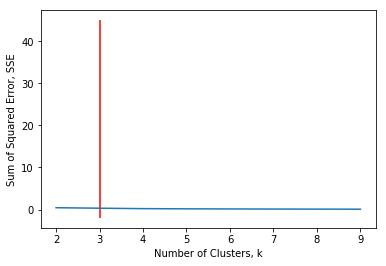

In [124]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# SSE is initialize with empty values
# n_clusters is the "k" 
sse = {}
for n_cluster1 in range(2, 10):
    kmeans1 = KMeans(n_clusters = n_cluster1, max_iter = 500).fit(e_grouped_clustering)
    e_grouped_clustering["clusters"] = kmeans1.labels_
    
    # The inertia is the sum of distances of samples to their closest cluster centre
    sse[n_cluster1] = kmeans1.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of Clusters, k")
plt.ylabel("Sum of Squared Error, SSE")
# vertical line
plt.vlines(3, ymin = -2, ymax = 45, colors = 'red')
plt.show()

Depending on the number of iteration (in this case, 500 iterations were used), the number of cluster, k is 3.

#### Silhouette Coefficient

To find the optimal value of the number of clusters, k, the number of clusters is iterated corresponding Silhouette Coefficientis calculated for each of the k-values used. The highest Silhouette Coefficient gives the best match to its own cluster. 

In [127]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

for n_cluster2 in range(2, 10):
    kmeans2 = KMeans(n_clusters = n_cluster2, random_state = 0).fit(e_grouped_clustering)
    label2 = kmeans2.labels_
    sil_coeff = silhouette_score(e_grouped_clustering, label2, metric = 'euclidean')
    print("Where n_clusters = {}, the Silhouette Coefficient is {}".format(n_cluster2, sil_coeff))

Where n_clusters = 2, the Silhouette Coefficient is 0.6451489980145108
Where n_clusters = 3, the Silhouette Coefficient is 0.7026898763024679
Where n_clusters = 4, the Silhouette Coefficient is 0.7166285222336382
Where n_clusters = 5, the Silhouette Coefficient is 0.7611295296162057
Where n_clusters = 6, the Silhouette Coefficient is 0.8043964789855756
Where n_clusters = 7, the Silhouette Coefficient is 0.8709546421010111
Where n_clusters = 8, the Silhouette Coefficient is 0.8935243099490878
Where n_clusters = 9, the Silhouette Coefficient is 0.9068528462192946


From the result, the high the n_clusters the better the silhouette coefficient. For this project, a cluster value of 5 will be used.

In [128]:
e_clusters.columns

Index(['Location', 'Borough', 'Postcode', 'Latitude', 'Longitude',
       'Cluster Labels', '1st Most Common Venue', '2nd Most Common Venue',
       '3rd Most Common Venue', '4th Most Common Venue',
       '5th Most Common Venue', '6th Most Common Venue',
       '7th Most Common Venue', '8th Most Common Venue',
       '9th Most Common Venue', '10th Most Common Venue'],
      dtype='object')

#### Visualizing the Resulting Clusters

In [129]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(e_clusters['Latitude'], e_clusters['Longitude'], e_clusters['Location'], e_clusters['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=20,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

display(map_clusters)

#### Cluster 1

In [130]:
e_clusters.loc[e_clusters['Cluster Labels'] == 0, e_clusters.columns[[1] + list(range(5, e_clusters.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Newham,0,Grocery Store,Indian Restaurant,Supermarket,Coffee Shop,Fast Food Restaurant,Hotel,Sandwich Place,Furniture / Home Store,Pub,Café
3,Newham,0,Pub,Grocery Store,Indian Restaurant,Coffee Shop,Fast Food Restaurant,Hotel,Train Station,Restaurant,Park,Café
7,Newham,0,Grocery Store,Indian Restaurant,Clothing Store,Fast Food Restaurant,Coffee Shop,Bakery,Supermarket,Park,Pub,Sandwich Place
8,Newham,0,Grocery Store,Indian Restaurant,Clothing Store,Fast Food Restaurant,Coffee Shop,Bakery,Supermarket,Park,Pub,Sandwich Place
16,Newham,0,Grocery Store,Fast Food Restaurant,Pub,Platform,Coffee Shop,Café,Gym / Fitness Center,Indian Restaurant,Park,Supermarket
27,Newham,0,Grocery Store,Coffee Shop,Indian Restaurant,Fast Food Restaurant,Supermarket,Pub,Sandwich Place,Hotel,Café,Platform
28,Newham,0,Grocery Store,Coffee Shop,Indian Restaurant,Fast Food Restaurant,Supermarket,Pub,Sandwich Place,Hotel,Café,Platform


#### Clusters 2

In [131]:
e_clusters.loc[e_clusters['Cluster Labels'] == 1, e_clusters.columns[[1] + list(range(5, e_clusters.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Tower Hamlets,1,Hotel,Coffee Shop,Pub,Italian Restaurant,Burger Joint,Park,Gym / Fitness Center,Turkish Restaurant,Bar,Plaza
4,Tower Hamlets,1,Hotel,Coffee Shop,Pub,Italian Restaurant,Burger Joint,Park,Gym / Fitness Center,Turkish Restaurant,Bar,Plaza
5,Tower Hamlets,1,Hotel,Coffee Shop,Pub,Italian Restaurant,Burger Joint,Park,Gym / Fitness Center,Turkish Restaurant,Bar,Plaza
6,Tower Hamlets,1,Hotel,Coffee Shop,Pub,Italian Restaurant,Burger Joint,Park,Gym / Fitness Center,Turkish Restaurant,Bar,Plaza
13,Tower Hamlets,1,Hotel,Coffee Shop,Pub,Italian Restaurant,Burger Joint,Park,Gym / Fitness Center,Turkish Restaurant,Bar,Plaza
17,Tower Hamlets,1,Hotel,Coffee Shop,Pub,Italian Restaurant,Burger Joint,Park,Gym / Fitness Center,Turkish Restaurant,Bar,Plaza
26,Tower Hamlets,1,Coffee Shop,Hotel,Cocktail Bar,Italian Restaurant,French Restaurant,Scenic Lookout,Gym / Fitness Center,Seafood Restaurant,Garden,Burger Joint
34,Tower Hamlets,1,Hotel,Coffee Shop,Pub,Italian Restaurant,Burger Joint,Park,Gym / Fitness Center,Turkish Restaurant,Bar,Plaza
39,Tower Hamlets,1,Hotel,Coffee Shop,Pub,Italian Restaurant,Burger Joint,Park,Gym / Fitness Center,Turkish Restaurant,Bar,Plaza


#### Cluster 3

In [132]:
e_clusters.loc[e_clusters['Cluster Labels'] == 2, e_clusters.columns[[1] + list(range(5, e_clusters.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,Tower Hamlets,2,Coffee Shop,Pub,Restaurant,Cocktail Bar,Hotel,Café,Italian Restaurant,Movie Theater,Salon / Barbershop,Middle Eastern Restaurant
18,Tower Hamlets,2,Coffee Shop,Pub,Restaurant,Cocktail Bar,Hotel,Café,Italian Restaurant,Movie Theater,Salon / Barbershop,Middle Eastern Restaurant
19,Tower Hamlets,2,Coffee Shop,Pub,Restaurant,Cocktail Bar,Hotel,Café,Italian Restaurant,Movie Theater,Salon / Barbershop,Middle Eastern Restaurant
22,Tower Hamlets,2,Coffee Shop,Pub,Restaurant,Cocktail Bar,Hotel,Café,Italian Restaurant,Movie Theater,Salon / Barbershop,Middle Eastern Restaurant
23,Tower Hamlets,2,Coffee Shop,Pub,Bookstore,Restaurant,Wine Bar,Bakery,Beer Bar,Pizza Place,Market,Hotel
24,Tower Hamlets,2,Coffee Shop,Pub,Restaurant,Cocktail Bar,Hotel,Café,Italian Restaurant,Movie Theater,Salon / Barbershop,Middle Eastern Restaurant
30,Tower Hamlets,2,Coffee Shop,Pub,Restaurant,Cocktail Bar,Hotel,Café,Italian Restaurant,Movie Theater,Salon / Barbershop,Middle Eastern Restaurant
33,Tower Hamlets,2,Coffee Shop,Pub,Restaurant,Cocktail Bar,Hotel,Café,Italian Restaurant,Movie Theater,Salon / Barbershop,Middle Eastern Restaurant
38,Tower Hamlets,2,Coffee Shop,Pub,Bookstore,Restaurant,Wine Bar,Bakery,Beer Bar,Pizza Place,Market,Hotel


#### Cluster 4

In [133]:
e_clusters.loc[e_clusters['Cluster Labels'] == 3, e_clusters.columns[[1] + list(range(5, e_clusters.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Newham,3,Hotel,Coffee Shop,Grocery Store,Pub,Park,Bar,Lounge,Burger Joint,Chinese Restaurant,Turkish Restaurant
9,Newham,3,Hotel,Coffee Shop,Grocery Store,Supermarket,Indian Restaurant,Fast Food Restaurant,Pub,Sandwich Place,Café,Park
10,Newham,3,Hotel,Coffee Shop,Grocery Store,Supermarket,Indian Restaurant,Fast Food Restaurant,Pub,Sandwich Place,Café,Park
14,Newham,3,Hotel,Coffee Shop,Grocery Store,Pub,Park,Bar,Lounge,Burger Joint,Chinese Restaurant,Turkish Restaurant
20,Newham,3,Hotel,Coffee Shop,Grocery Store,Pub,Park,Bar,Lounge,Burger Joint,Chinese Restaurant,Turkish Restaurant
40,Newham,3,Hotel,Coffee Shop,Grocery Store,Pub,Park,Bar,Lounge,Burger Joint,Chinese Restaurant,Turkish Restaurant


#### Cluster 5

In [134]:
e_clusters.loc[e_clusters['Cluster Labels'] == 4, e_clusters.columns[[1] + list(range(5, e_clusters.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,Newham,4,Pub,Café,Park,Grocery Store,Art Gallery,Coffee Shop,Bar,Hotel,Clothing Store,Fish & Chips Shop
15,Tower Hamlets,4,Pub,Café,Park,Coffee Shop,Canal Lock,Art Gallery,Bar,Turkish Restaurant,Gym,Restaurant
21,Redbridge,4,Coffee Shop,Pub,Grocery Store,Italian Restaurant,Metro Station,Indian Restaurant,Park,Supermarket,Café,Turkish Restaurant
25,Newham,4,Pub,Café,Park,Grocery Store,Art Gallery,Coffee Shop,Bar,Hotel,Clothing Store,Fish & Chips Shop
29,Redbridge,4,Pub,Café,Grocery Store,Park,Mediterranean Restaurant,Bakery,Coffee Shop,Restaurant,Pizza Place,Turkish Restaurant
31,Newham,4,Pub,Grocery Store,Café,Coffee Shop,Park,Fast Food Restaurant,Gym / Fitness Center,Art Gallery,Hotel,Fish & Chips Shop
32,Newham,4,Pub,Grocery Store,Café,Coffee Shop,Park,Fast Food Restaurant,Gym / Fitness Center,Art Gallery,Hotel,Fish & Chips Shop
35,Redbridge,4,Coffee Shop,Pub,Grocery Store,Italian Restaurant,Metro Station,Indian Restaurant,Park,Supermarket,Café,Turkish Restaurant
36,Tower Hamlets,4,Pub,Café,Park,Coffee Shop,Canal Lock,Art Gallery,Bar,Turkish Restaurant,Gym,Restaurant
37,Tower Hamlets,4,Pub,Café,Park,Coffee Shop,Canal Lock,Art Gallery,Bar,Turkish Restaurant,Gym,Restaurant


## Results

The following are the highlights of the 5 clusters above:

1. Pubs, Cafe, Coffee Shops are popular in the East London.
2. As for restaurants, the Italian Restaurants are very popular in the East London area. Especially in Redbridge.
3. With the Newham area being the most condensed area of Asians in the East Area, it is surprising to see how in the top 10 venues, you can barely see restaurants in the top 5 venues.
4. Although, the Clusters have variations, a very visible presence is the predominance of pubs.

## Discussion

It is very important to note that Clusters 2 and 3 are the most viable clusters to create a brand Indian Restaurant. Their proximity to other amenities and accessibility to station are paramount. These 2 clusters do not have top restaurants that could rival their standards if they are created. 

## Conclusion 

In conclusion, this project would have had better results if there were more data in terms of crime data within the area, traffic access and allowance of more venues exploration with the Foursquare (limited venues for free calls).

Also, getting the ratings and feedbacks of the current restaurants within the clusters would have helped in providing more insight into the best location.